In [1]:
import numpy as np
import pandas as pd                               
import os
import csv
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#Path of dataset
folder1=r"C:\Users\rugve\edi_sem5_new_2class\Activity Recognition Dataset\Chit chat"
# folder2=r"C:\Users\rugve\edi_sem5\Activity Recognition Dataset\Recreation"
folder3=r"C:\Users\rugve\edi_sem5_new_2class\Activity Recognition Dataset\Studying"

In [3]:
k=0
i=0
for filename in os.listdir(folder1):
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(512,512)
    try:
      img=cv2.resize(a,resize)#resize image
    except:
      continue

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image

    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img2, None)

    
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    k=k+1
    if k==600:
      break
    
    #append to the csv file
    csv_data=out.to_csv('folder1.csv', mode='a', index=False)

descriptor shape  0  :  (267, 128)
descriptor shape  1  :  (485, 128)
descriptor shape  2  :  (347, 128)
descriptor shape  3  :  (414, 128)
descriptor shape  4  :  (543, 128)
descriptor shape  5  :  (351, 128)
descriptor shape  6  :  (162, 128)
descriptor shape  7  :  (213, 128)
descriptor shape  8  :  (143, 128)
descriptor shape  9  :  (486, 128)
descriptor shape  10  :  (575, 128)
descriptor shape  11  :  (225, 128)
descriptor shape  12  :  (374, 128)
descriptor shape  13  :  (224, 128)
descriptor shape  14  :  (272, 128)
descriptor shape  15  :  (337, 128)
descriptor shape  16  :  (161, 128)
descriptor shape  17  :  (265, 128)
descriptor shape  18  :  (280, 128)
descriptor shape  19  :  (906, 128)
descriptor shape  20  :  (347, 128)
descriptor shape  21  :  (263, 128)
descriptor shape  22  :  (399, 128)
descriptor shape  23  :  (516, 128)
descriptor shape  24  :  (271, 128)
descriptor shape  25  :  (736, 128)
descriptor shape  26  :  (197, 128)
descriptor shape  27  :  (335, 128)
de

descriptor shape  227  :  (338, 128)
descriptor shape  228  :  (425, 128)
descriptor shape  229  :  (548, 128)
descriptor shape  230  :  (314, 128)
descriptor shape  231  :  (542, 128)
descriptor shape  232  :  (489, 128)
descriptor shape  233  :  (1310, 128)
descriptor shape  234  :  (370, 128)
descriptor shape  235  :  (628, 128)
descriptor shape  236  :  (282, 128)
descriptor shape  237  :  (825, 128)
descriptor shape  238  :  (406, 128)
descriptor shape  239  :  (401, 128)
descriptor shape  240  :  (376, 128)
descriptor shape  241  :  (469, 128)
descriptor shape  242  :  (190, 128)
descriptor shape  243  :  (1591, 128)
descriptor shape  244  :  (147, 128)
descriptor shape  245  :  (701, 128)
descriptor shape  246  :  (568, 128)
descriptor shape  247  :  (736, 128)
descriptor shape  248  :  (477, 128)
descriptor shape  249  :  (335, 128)
descriptor shape  250  :  (408, 128)
descriptor shape  251  :  (410, 128)
descriptor shape  252  :  (414, 128)
descriptor shape  253  :  (889, 128)

In [4]:
#reading previously saved feature descriptor csv file of folder1 and save it into a dataframe
data1 = pd.read_csv('folder1.csv',header=None,dtype='uint8')

data1=data1.astype(np.uint8) 
data1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
1,131,10,0,0,0,0,0,40,147,115,...,0,31,0,0,0,0,0,0,0,0
2,71,4,0,0,0,0,1,14,117,32,...,0,135,38,0,0,0,0,0,0,11
3,0,0,0,0,0,1,54,84,15,2,...,24,28,0,0,0,0,0,0,0,2
4,0,0,0,0,1,1,15,4,4,0,...,0,35,84,13,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147561,5,23,3,1,8,21,1,0,49,89,...,1,74,1,0,0,0,0,0,0,6
147562,0,82,81,0,0,0,1,0,0,133,...,0,6,36,17,0,0,0,0,0,1
147563,27,91,75,53,11,2,4,0,80,40,...,0,3,3,0,0,0,0,0,0,0
147564,144,1,0,0,0,0,1,144,144,15,...,0,9,1,0,0,0,0,0,0,0


In [5]:
i=0
k=0
for filename in os.listdir(folder3):
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(512,512)
    try:
      img=cv2.resize(a,resize)#resize image
      gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
      
    except:
      continue
    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img2, None)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    k=k+1
    if k==600:
      break
    
    #append to the csv file
    csv_data=out.to_csv('folder3.csv', mode='a', index=False)

descriptor shape  0  :  (170, 128)
descriptor shape  1  :  (122, 128)
descriptor shape  2  :  (572, 128)
descriptor shape  3  :  (106, 128)
descriptor shape  4  :  (142, 128)
descriptor shape  5  :  (140, 128)
descriptor shape  6  :  (232, 128)
descriptor shape  7  :  (597, 128)
descriptor shape  8  :  (197, 128)
descriptor shape  9  :  (231, 128)
descriptor shape  10  :  (171, 128)
descriptor shape  11  :  (307, 128)
descriptor shape  12  :  (184, 128)
descriptor shape  13  :  (183, 128)
descriptor shape  14  :  (239, 128)
descriptor shape  15  :  (144, 128)
descriptor shape  16  :  (213, 128)
descriptor shape  17  :  (213, 128)
descriptor shape  18  :  (465, 128)
descriptor shape  19  :  (529, 128)
descriptor shape  20  :  (117, 128)
descriptor shape  21  :  (214, 128)
descriptor shape  22  :  (696, 128)
descriptor shape  23  :  (200, 128)
descriptor shape  24  :  (350, 128)
descriptor shape  25  :  (230, 128)
descriptor shape  26  :  (365, 128)
descriptor shape  27  :  (266, 128)
de

descriptor shape  226  :  (292, 128)
descriptor shape  227  :  (201, 128)
descriptor shape  228  :  (240, 128)
descriptor shape  229  :  (374, 128)
descriptor shape  230  :  (264, 128)
descriptor shape  231  :  (384, 128)
descriptor shape  232  :  (155, 128)
descriptor shape  233  :  (222, 128)
descriptor shape  234  :  (31, 128)
descriptor shape  235  :  (249, 128)
descriptor shape  236  :  (266, 128)
descriptor shape  237  :  (412, 128)
descriptor shape  238  :  (143, 128)
descriptor shape  239  :  (216, 128)
descriptor shape  240  :  (272, 128)
descriptor shape  241  :  (687, 128)
descriptor shape  242  :  (96, 128)
descriptor shape  243  :  (116, 128)
descriptor shape  244  :  (248, 128)
descriptor shape  245  :  (192, 128)
descriptor shape  246  :  (298, 128)
descriptor shape  247  :  (183, 128)
descriptor shape  248  :  (254, 128)
descriptor shape  249  :  (391, 128)
descriptor shape  250  :  (244, 128)
descriptor shape  251  :  (405, 128)
descriptor shape  252  :  (233, 128)
des

In [6]:
#reading previously saved feature descriptor csv file of folder2 and save it into a dataframe
data3= pd.read_csv('folder3.csv',header=None,dtype='uint8')
data3=data3.astype(np.uint8)
data3

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
1,2,155,155,0,0,1,1,0,35,155,...,0,21,2,0,0,0,0,0,0,0
2,9,4,1,11,15,20,33,5,170,38,...,0,0,1,0,0,0,0,0,0,0
3,9,6,19,59,28,0,0,1,71,42,...,20,58,0,0,0,0,0,0,0,3
4,4,0,0,2,18,17,21,30,74,28,...,0,12,91,48,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119281,26,32,1,0,0,0,0,1,163,163,...,0,0,1,0,0,0,0,0,0,0
119282,0,43,141,2,0,0,0,0,9,107,...,14,141,10,0,0,0,0,0,70,36
119283,15,29,30,0,0,29,26,2,0,14,...,0,29,22,0,0,0,0,0,0,4
119284,1,12,38,92,43,0,0,0,46,139,...,49,31,0,0,1,0,0,0,7,4


In [7]:
#append all the class wise feature descriptor data into one data frame
# dataA=data1.append(data2)
# dataA


data=data1.append(data3)


data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
1,131,10,0,0,0,0,0,40,147,115,...,0,31,0,0,0,0,0,0,0,0
2,71,4,0,0,0,0,1,14,117,32,...,0,135,38,0,0,0,0,0,0,11
3,0,0,0,0,0,1,54,84,15,2,...,24,28,0,0,0,0,0,0,0,2
4,0,0,0,0,1,1,15,4,4,0,...,0,35,84,13,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119281,26,32,1,0,0,0,0,1,163,163,...,0,0,1,0,0,0,0,0,0,0
119282,0,43,141,2,0,0,0,0,9,107,...,14,141,10,0,0,0,0,0,70,36
119283,15,29,30,0,0,29,26,2,0,14,...,0,29,22,0,0,0,0,0,0,4
119284,1,12,38,92,43,0,0,0,46,139,...,49,31,0,0,1,0,0,0,7,4


In [10]:
# data=dataA.append(data3)
# data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
1,16,5,0,0,0,0,0,3,166,1,...,0,53,1,0,0,0,0,0,0,0
2,143,18,0,0,0,0,0,31,143,140,...,0,28,1,0,0,0,0,0,0,0
3,9,2,1,0,0,0,0,3,161,1,...,0,61,1,0,0,0,0,0,0,0
4,7,4,0,1,2,0,0,0,150,42,...,0,108,8,1,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93843,13,2,2,15,68,4,1,7,10,8,...,0,21,0,0,0,0,0,0,0,0
93844,15,12,22,16,0,0,0,0,165,77,...,0,0,13,115,8,0,0,0,0,0
93845,17,15,0,0,0,0,0,1,97,5,...,0,44,57,0,0,0,0,0,0,28
93846,2,4,35,87,58,5,0,1,68,43,...,0,3,1,0,0,0,0,0,0,0


In [8]:
#Applying Kmeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [9]:
#save the model to disk
import pickle
filename = 'Kmeans_CL_2_Model.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [10]:
#calculate histogram of trained kmeans
hist = np.histogram(kmeans.labels_,bins=[0,1,2,3])

print("Histogram of trained kmeans")
print(hist, "\n")

Histogram of trained kmeans
(array([90946, 87721, 88185], dtype=int64), array([0, 1, 2, 3])) 



In [11]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model


#initialising i=0;
i=0
data=[]

for filename in os.listdir(folder1):
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    resize=(512,512)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
    
    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img2, None)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3])
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder1.csv', mode='a', index=False)

In [12]:
#performing kmeans prediction of the entire  dataset with the pretrained kmeans model


#initialising i=2;
i=2
data=[]

for filename in os.listdir(folder3):
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    resize=(512,512)
    try:
      img=cv2.resize(a,resize)
    except:
      continue
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img2= cv2.GaussianBlur(gray,(5,5),0)#gaussian Image
    
    
    #initialise sift descriptor
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img2, None)
    
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    
    #predict values of feature vector with pretrained kmeans
    #ValueError: Buffer dtype mismatch, expected 'float' but got 'double', in order to avoid this dtype=np.double
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3])
    #append the dataframe into the array in append mode, the array will only have 5 values which will store the values in a row
    data.append(hist[0])
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('finalFolder3.csv', mode='a', index=False)

In [ ]:
# out

In [13]:
#Displaying the kmeans predicted data of folder1
print("chitchat")
dat1= pd.read_csv('finalFolder1.csv',header=None)
print(dat1)

chitchat
       0    1    2      3
0      0    1    2  Class
1     93   95   79      0
2    151  156  178      0
3    109  161   77      0
4    123  190  101      0
..   ...  ...  ...    ...
325  163  219  183      0
326   97  107  107      0
327  108   69  144      0
328  210  259  215      0
329  271  170  277      0

[330 rows x 4 columns]


In [14]:
#Displaying the kmeans predicted data of folder2
print("studying")
dat3= pd.read_csv('finalFolder3.csv',header=None)
print(dat3)

studying
       0    1    2      3
0      0    1    2  Class
1     50   73   47      2
2     28   52   42      2
3    297  115  160      2
4     32   45   29      2
..   ...  ...  ...    ...
394  127   93   75      2
395   97  120   62      2
396   96  116  106      2
397   27   35   28      2
398   40   83   65      2

[399 rows x 4 columns]


In [20]:
# #appending All kmeans predicted data into 1 dataframe
# B = dat1.append(dat2)
# B

,0,1,2,3,4,5
0,0,1,2,3,4,Class
1,9,19,58,44,18,0
2,72,53,72,97,78,0
3,42,21,86,42,44,0
4,17,50,112,73,52,0
...,...,...,...,...,...,...
371,69,69,78,115,112,1
372,50,51,39,65,82,1
373,17,15,53,31,30,1
374,151,57,56,79,171,1


In [15]:
A = dat1.append(dat3)

In [21]:
# A = B.append(dat3)

In [16]:
A

,0,1,2,3
0,0,1,2,Class
1,93,95,79,0
2,151,156,178,0
3,109,161,77,0
4,123,190,101,0
...,...,...,...,...
394,127,93,75,2
395,97,120,62,2
396,96,116,106,2
397,27,35,28,2


In [17]:
#save the predicted data into csv file
csv_data=A.to_csv('FinalF.csv', mode='a',header=False,index=False)

In [18]:
#read the data from the previously saved csv file
A = pd.read_csv("FinalF.csv",header=None)
A

,0,1,2,3
0,93,95,79,0
1,151,156,178,0
2,109,161,77,0
3,123,190,101,0
4,161,198,184,0
...,...,...,...,...
722,127,93,75,2
723,97,120,62,2
724,96,116,106,2
725,27,35,28,2


In [19]:
df=A

In [20]:
df

,0,1,2,3
0,93,95,79,0
1,151,156,178,0
2,109,161,77,0
3,123,190,101,0
4,161,198,184,0
...,...,...,...,...
722,127,93,75,2
723,97,120,62,2
724,96,116,106,2
725,27,35,28,2


In [ ]:
# df=df.drop(df[0:], axis=0)  

In [28]:
df

,0,1,2,3,4,5
0,9,19,58,44,18,0
1,72,53,72,97,78,0
2,42,21,86,42,44,0
3,17,50,112,73,52,0
4,45,52,50,88,67,0
...,...,...,...,...,...,...
1074,22,56,59,92,51,2
1075,45,61,108,88,69,2
1076,20,52,65,34,40,2
1077,18,11,29,23,25,2


In [21]:
rows,columns=df.shape

In [ ]:
from pandas.core.indexes.multi import duplicated



# df=df.drop(df[0:], axis=0)  
df=df.drop_duplicates()

In [22]:
df.shape

(727, 4)

In [23]:
df


,0,1,2,3
0,93,95,79,0
1,151,156,178,0
2,109,161,77,0
3,123,190,101,0
4,161,198,184,0
...,...,...,...,...
722,127,93,75,2
723,97,120,62,2
724,96,116,106,2
725,27,35,28,2


In [25]:
df.head()

,0,1,2,3,4,5
0,21,12,18,36,49,0
1,56,55,53,48,66,0
2,26,24,15,27,81,0
3,27,14,24,45,91,0
4,48,29,44,67,72,0


In [26]:
df.tail()

,0,1,2,3,4,5
722,21,11,15,28,39,2
723,22,23,22,41,60,2
724,39,36,28,30,32,2
725,10,11,9,9,15,2
726,14,21,18,10,27,2


In [24]:
#Check for NaN under a single DataFrame column
df.isnull().values.any()

False

In [25]:
# statistical measures about the data
df.describe()

,0,1,2,3
count,727.000000,727.000000,727.000000,727.000000
mean,124.097662,120.661623,121.299862,1.094911
std,102.388608,59.362671,98.883663,0.996171
min,4.000000,12.000000,3.000000,0.000000
25%,62.000000,78.000000,62.000000,0.000000
50%,96.000000,107.000000,94.000000,2.000000
75%,155.500000,153.000000,152.000000,2.000000
max,1203.000000,396.000000,1126.000000,2.000000


In [26]:
df.dtypes

0    int64
1    int64
2    int64
3    int64
dtype: object

In [ ]:
df[5] = df[5].map(
    {'0':0 ,'1':1})

SyntaxError: ignored

In [37]:
df[5].value_counts()

2        381
1        375
0        321
Class      2
Name: 5, dtype: int64

In [ ]:
#Load Data
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("FinalF.csv", na_values=['?'])

Saving FinalF.csv to FinalF (1).csv


In [ ]:
df.dtypes

0         int64
1         int64
2         int64
3         int64
4         int64
Class    object
dtype: object

In [ ]:
df

,0,1,2,3,4,Class
0,196,344,175,100,684,0
1,69,166,107,82,402,0
2,293,523,305,159,851,0
3,371,631,330,220,1019,0
4,199,267,232,140,725,0
...,...,...,...,...,...,...
6466,47,91,88,52,249,2
6467,82,140,257,136,448,2
6468,32,68,54,26,202,2
6469,61,109,87,56,287,2


In [ ]:
from pandas.core.indexes.multi import duplicated
# df=df.drop(df[0:], axis=0)  
df=df.drop_duplicates()

In [27]:
X = df.drop(columns=3, axis=1)
Y = df[3]

In [28]:
X

,0,1,2
0,93,95,79
1,151,156,178
2,109,161,77
3,123,190,101
4,161,198,184
...,...,...,...
722,127,93,75
723,97,120,62
724,96,116,106
725,27,35,28


In [29]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
722    2
723    2
724    2
725    2
726    2
Name: 3, Length: 727, dtype: int64

In [30]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state = 0)
# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", Y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", Y_test.shape)

Number transactions X_train dataset:  (581, 3)
Number transactions y_train dataset:  (581,)
Number transactions X_test dataset:  (146, 3)
Number transactions y_test dataset:  (146,)


In [31]:
print(X.shape) 
print(X_train.shape)
print(X_test.shape)

(727, 3)
(581, 3)
(146, 3)


In [32]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score, classification_report, confusion_matrix , accuracy_score, precision_score, recall_score, f1_score, roc_curve ,roc_auc_score,plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


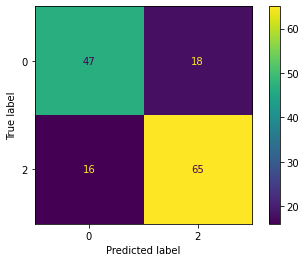

Accuracy on Train data :  0.7039586919104991
Accuracy on Test data :  0.7671232876712328


In [43]:
modelSVM=SVC(kernel='linear')
modelSVM.fit(X_train, Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelSVM, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelSVM.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelSVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))   

In [33]:
from sklearn import svm
#create a classifier
modelXGB = svm.SVC(kernel="linear")
#train the model
modelXGB.fit(X_train,Y_train)
#predict the response
# pred = cls.predict(X_test)

# Accuracy on training data
X_train_prediction = modelXGB.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('\nResults obtained for the XGB')

print('\nResults obtained on Training Data')

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# Accuracy on test data
X_test_prediction = modelXGB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


print('\nResults obtained on Testing Data')

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test)


Results obtained for the XGB

Results obtained on Training Data
Accuracy on Train data :  0.7039586919104991

Results obtained on Testing Data
Accuracy on Test data :  0.7671232876712328


C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


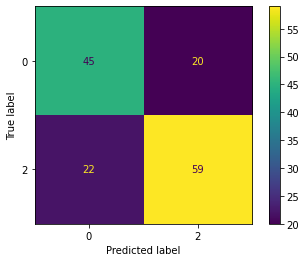

Accuracy on Train data :  0.7142857142857143
Accuracy on Test data :  0.7123287671232876


In [42]:
modelSVM=SVC(kernel='rbf')
modelSVM.fit(X_train, Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelSVM, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelSVM.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelSVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))  

C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


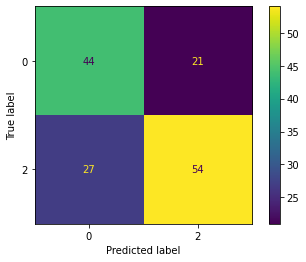

Accuracy on Train data :  1.0
Accuracy on Test data :  0.6712328767123288


In [35]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelRF, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))

## produce a ROC plot ##
#obtain prediction probabilities
# y_prob = modelRF.predict_proba(X_test)
# #calculate false & true positive rates
# fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
# #construct plot
# plt.plot(fpr,tpr)
# plt.title('Receiver Operating Characteristic')
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

C:\Users\rugve\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


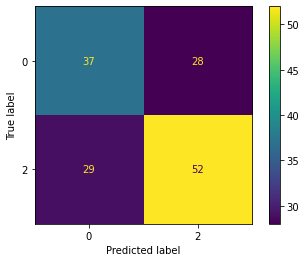

Accuracy on Train data :  0.8726333907056799
Accuracy on Test data :  0.6095890410958904


In [36]:
modelRF = DecisionTreeClassifier(max_depth=9)
modelRF.fit(X_train,Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelRF, X_test, Y_test)  
plt.show() 

# accuracy on training data
X_train_prediction = modelRF.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# accuracy on test data
X_test_prediction = modelRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))

## produce a ROC plot ##
#obtain prediction probabilities
# y_prob = modelRF.predict_proba(X_test)
# #calculate false & true positive rates
# fpr,tpr,_ = roc_curve(Y_test, y_prob[:,1])
# #construct plot
# plt.plot(fpr,tpr)
# plt.title('Receiver Operating Characteristic')
# plt.plot([0, 1], ls="--")
# plt.plot([0, 0], [1, 0] , c=".8"), plt.plot([1, 1] , c=".8")
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')
# plt.show()

In [88]:
modelXGB=XGBClassifier()
modelXGB.fit(X_train, Y_train)

## produce a confusion matrix ##
plot_confusion_matrix(modelXGB, X_test, Y_test)  
plt.show() 

# Accuracy on training data
X_train_prediction = modelXGB.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('\nResults obtained for the XGB')

print('\nResults obtained on Training Data')

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# Accuracy on test data
X_test_prediction = modelXGB.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


print('\nResults obtained on Testing Data')

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1], got [0 2]

In [37]:
#knn
modelknn=KNeighborsClassifier()
modelknn.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = modelknn.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction ,Y_train)

print('\nResults obtained for the knn')

print('\nResults obtained on Training Data')

print('Accuracy on Train data : ', train_data_accuracy)

# print('Presion :',precision_score(X_train_prediction,Y_train))

# print('Recall :',recall_score(X_train_prediction,Y_train))

# print('F1 score : ', f1_score(X_train_prediction,Y_train))

# Accuracy on test data
X_test_prediction = modelknn.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


print('\nResults obtained on Testing Data')

print('Accuracy on Test data : ', test_data_accuracy)

# print('Presion :',precision_score(X_test_prediction,Y_test))

# print('Recall :',recall_score(X_test_prediction,Y_test))

# print('F1 score : ', f1_score(X_test_prediction,Y_test))


Results obtained for the knn

Results obtained on Training Data
Accuracy on Train data :  0.7831325301204819

Results obtained on Testing Data
Accuracy on Test data :  0.6643835616438356


In [38]:
import joblib


In [39]:
from sklearn import svm
model_svm_s = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')
model_svm_s.fit(X_train, Y_train)
joblib.dump(model_svm_s,"model_svm_s")
y_pred5 = model_svm_s.predict(X_test)
print("SVM Sigmoid kernel")
print("Train Accuracy:",model_svm_s.score(X_train, Y_train))
print("Test Accuracy:",model_svm_s.score(X_test, Y_test))
print("Precision Score: ",metrics.precision_score(Y_test, y_pred5, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(Y_test, y_pred5, pos_label='positive', average='micro'))
# print("F1 Score: ",metrics.f1_score(y_test, y_pred5, pos_label='positive', average='micro'))
# print(plot_ROC_curve(model_svm_s,x_train, x_test, y_train, y_test))

SVM Sigmoid kernel
Train Accuracy: 0.3218588640275387
Test Accuracy: 0.3493150684931507
Precision Score:  0.3493150684931507
Recall Score:  0.3493150684931507


C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [40]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB().fit(X_train, Y_train)
joblib.dump(model_nb,"model_nb")
y_pred8 = model_nb.predict(X_test)
print("Gaussian NB")
print("Train Accuracy:",model_nb.score(X_train, Y_train))
print("Test Accuracy:",model_nb.score(X_test, Y_test))
print("Precision Score: ",metrics.precision_score(Y_test, y_pred8, pos_label='positive', average='micro'))
print("Recall Score: ",metrics.recall_score(Y_test, y_pred8, pos_label='positive', average='micro'))
print("F1 Score: ",metrics.f1_score(Y_test, y_pred8, pos_label='positive', average='micro'))
# print(plot_ROC_curve(model_nb,x_train, x_test, y_train, y_test))

Gaussian NB
Train Accuracy: 0.6781411359724613
Test Accuracy: 0.7054794520547946
Precision Score:  0.7054794520547946
Recall Score:  0.7054794520547946
F1 Score:  0.7054794520547946


C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\rugve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1386: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
